# 장난감 블록을 이용해 숫자, 알파벳, 자유패턴을 표현한 이미지 분류
먼저 데이터 집어놓고 어떤 형식인지 알아보도록 합니다.

In [3]:
!7z x data.zip -o./data


7-Zip [64] 17.04 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.04 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs x64)

Scanning the drive for archives:
  0M Sca        1 file, 20208454033 bytes (19 GiB)

Extracting archive: data.zip
 66% 4096 Op            --
Path = data.zip
Type = zip
Physical Size = 20208454033
64-bit = +
Characteristics = Zip64

      0% 5 - 숫자인식/00/n00/4d_n00_03.j                                          0% 8 - 숫자인식/00/n00/4d_n00_06.j                                          0% 11 - 숫자인식/00/n00/4d_n00_09.jp                                            0% 15 - 숫자인식/00/n00/4d_n00_13.jp                                            0% 17 - 숫자인식/00/n00/4d_n00_15.jp                                            0% 20 - 숫자인식/00/n00/4d_n00_18.jp                                            0% 22 - 숫자인식/00/n00/4d_n00_20.jp                                            0% 24 - 숫자인식/00/n00/4d_n00_22.jp                                            0% 27 - 숫자

In [6]:
!tree -d -L 2 data

data
├── 숫자인식
│   ├── 숫자 추가
│   ├── 00
│   ├── 01
│   ├── 02
│   ├── 03
│   ├── 04
│   ├── 05
│   ├── 06
│   ├── 07
│   ├── 08
│   └── 09
├── 자유패턴
│   ├── 10
│   ├── 128
│   ├── 20
│   ├── 30
│   ├── 40
│   ├── 50
│   ├── a_g
│   ├── a_m
│   └── a_r
└── 알파벳인식
    ├── 알파벳 추가
    ├── A
    ├── B
    ├── C
    ├── D
    ├── E
    ├── F
    ├── G
    ├── H
    ├── I
    ├── J
    ├── K
    ├── L
    ├── M
    ├── N
    ├── O
    ├── P
    ├── Q
    ├── R
    ├── S
    ├── T
    ├── U
    ├── V
    ├── W
    ├── X
    ├── Y
    └── Z

51 directories


숫자인식, 자유패턴 그리고 알파벳인식 폴더가 주어져 있습니다. 
파일 위치를 통해 라벨을 알 수가 있네요. 과제 설명에 있듯이 색 반전의 데이터도 구분되어 있습니다.

몇가지 사진을 가져 보겠습니다.

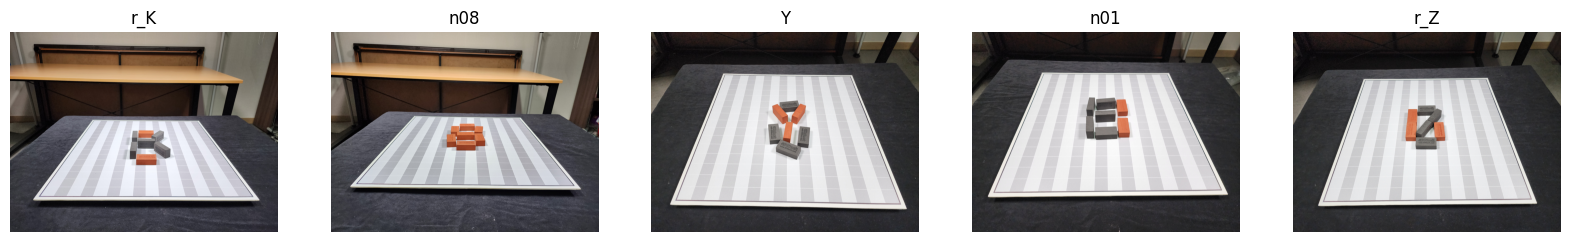

In [1]:
# view some images
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

# get some random images
image_files = []
for root, dirs, files in os.walk('./data'):
    for file in files:
        if file.endswith('.jpg'):
            image_files.append(os.path.join(root, file))

sampled_images = random.sample(image_files, 5)

# display images
fig, axs = plt.subplots(1, 5, figsize=(20, 20))
for i, image_file in enumerate(sampled_images):
    image = Image.open(image_file)
    axs[i].set_title(image_file.split('/')[-2])
    axs[i].imshow(image)
    axs[i].axis('off')

## 숫자 / 알파벳 / 자유패턴 카테고리 분류

각 이미지의 레이블은 파일 위치를 통해 알 수 있습니다. 우선 이미지 경로와 각 범주가 있는 데이터프레임을 만듭니다.

In [2]:
image_files[:5]

['./data/숫자인식/00/n00/4d_n00_18.jpg',
 './data/숫자인식/00/n00/4d_n00_01.jpg',
 './data/숫자인식/00/n00/4d_n00_02.jpg',
 './data/숫자인식/00/n00/4d_n00_03.jpg',
 './data/숫자인식/00/n00/4d_n00_04.jpg']

In [3]:
import pandas as pd
import numpy as np

def get_label(image_path):
    if image_path.startswith('./data/숫자인식/'):
        return 'number'
    elif image_path.startswith('./data/알파벳인식/'):
        return 'alphabet'
    else:
        return 'free_pattern'

labels = []

for image_file in image_files:
    label = get_label(image_file)
    labels.append(label)

df = pd.DataFrame({'image_path': image_files, 'label': labels})
df.head()

image_path   label
0  ./data/숫자인식/00/n00/4d_n00_18.jpg  number
1  ./data/숫자인식/00/n00/4d_n00_01.jpg  number
2  ./data/숫자인식/00/n00/4d_n00_02.jpg  number
3  ./data/숫자인식/00/n00/4d_n00_03.jpg  number
4  ./data/숫자인식/00/n00/4d_n00_04.jpg  number

분류를 위해 one-hot-encode 사용

In [4]:
class_columns = ['number', 'alphabet', 'free_pattern']

one_hot_encoded = pd.get_dummies(df['label'])
one_hot_encoded = one_hot_encoded[class_columns]

df = pd.concat([df, one_hot_encoded], axis=1)
df.drop(['label'], axis=1, inplace=True)
df.head()

image_path  number  alphabet  free_pattern
0  ./data/숫자인식/00/n00/4d_n00_18.jpg    True     False         False
1  ./data/숫자인식/00/n00/4d_n00_01.jpg    True     False         False
2  ./data/숫자인식/00/n00/4d_n00_02.jpg    True     False         False
3  ./data/숫자인식/00/n00/4d_n00_03.jpg    True     False         False
4  ./data/숫자인식/00/n00/4d_n00_04.jpg    True     False         False

In [5]:
df.iloc[:, 1:].sum(axis=0)

number          1501
alphabet        3920
free_pattern     522
dtype: int64

약간의 범주 불균형이 있습니다. 일단 그것을 주목하고 나중에 '범주 가중치'를 사용하여 분류를 개선하는지 확인하도록 합니다.

### 데이터 훈련/테스트 세트 분류
끝까지 테스트 데이터 보지 않도록 주의합니다.

In [6]:
from sklearn.model_selection import train_test_split
X = df['image_path']
y = df[class_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5645,), (298,), (5645, 3), (298, 3))

In [7]:
import tensorflow as tf

def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = tf.cast(image, tf.float32) / 255.0
    return image

images = X_train.apply(preprocess_image)
X_train_p = np.stack(images)
y_train_p = np.stack(y_train)

X_train_p.shape, y_train_p.shape

2023-09-01 05:16:29.686639: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-01 05:16:29.733459: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-01 05:16:29.734545: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-01 05:16:31.321865: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-01 05:16:32.650179: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

((5645, 224, 224, 3), (3,))

X_train 몇가지 사진 둘러보기

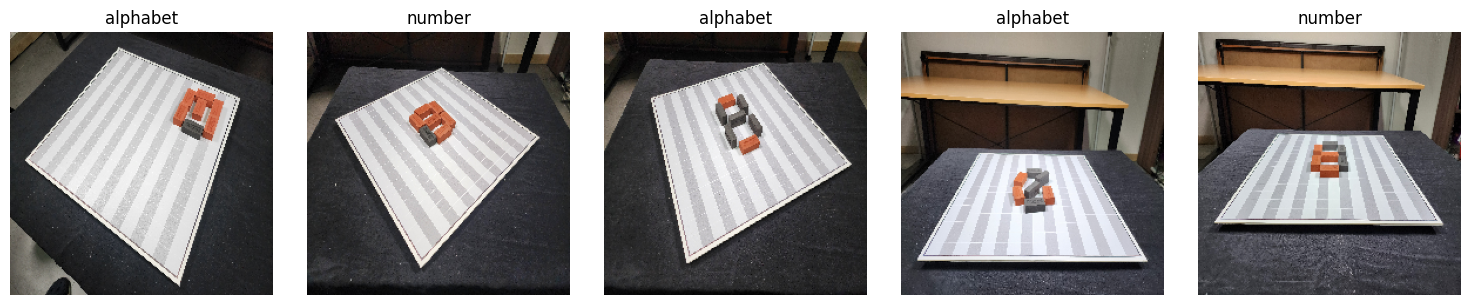

In [11]:
sample_indices = random.sample(range(len(X_train)), 5)
random_sample = X_train_p[sample_indices]

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):

    axes[i].imshow(random_sample[i])
    axes[i].set_title(y_train.iloc[sample_indices[i]].idxmax())
    axes[i].axis('off')

plt.tight_layout()
plt.show()

라벨은 일치하는 것 같습니다.

CNN모델을 만들겠습니다.

# 기준선 모델
기준선을 위해 간단한 CNN모델을 만들어 보겠습니다.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [17]:
history = model.fit(X_train_p, y_train_p, epochs=10, batch_size=32, validation_split=0.1)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

: 

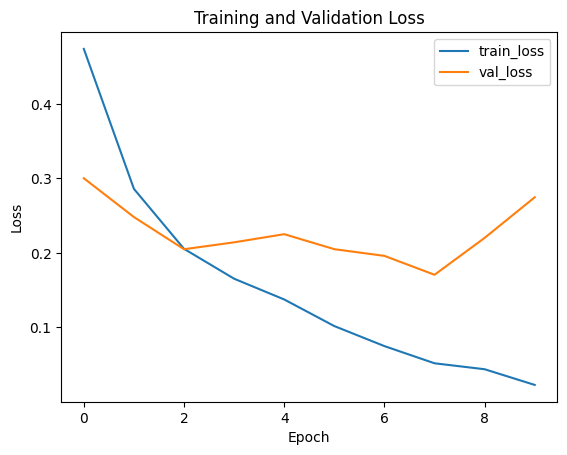

In [12]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [13]:
model.save('baseline_cnn')

INFO:tensorflow:Assets written to: baseline_cnn/assets


INFO:tensorflow:Assets written to: baseline_cnn/assets


검증 정확도는 이미 93.27%에 나옵니다. 약간 의심스럽네요.

성능을 높이기 위해 몇가지 절차를 수행할 것입니다.
- OpenCV를 통한 이미지 전처리
- 전이학습된 모델 사용 (ResNet, VGG16, 등)
- 숫자, 알파벳 분류 직접 예측
- 데이터 증강
- 초매개 변수 조정

### OpenCV를 통한 이미지 전처리

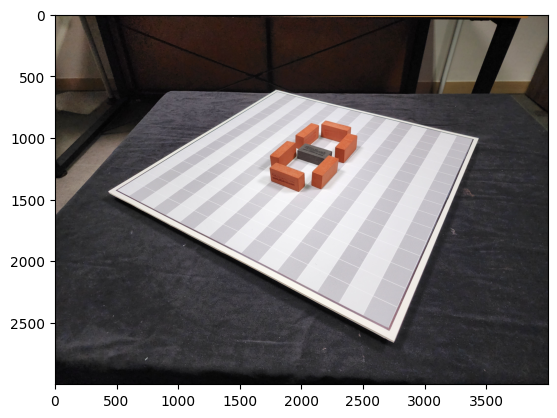

In [6]:
import cv2

img_path = df['image_path'].iloc[0]

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

보드만 보이도록 이미지를 잘라 회전시킬 수 있는지 알아봅시다.

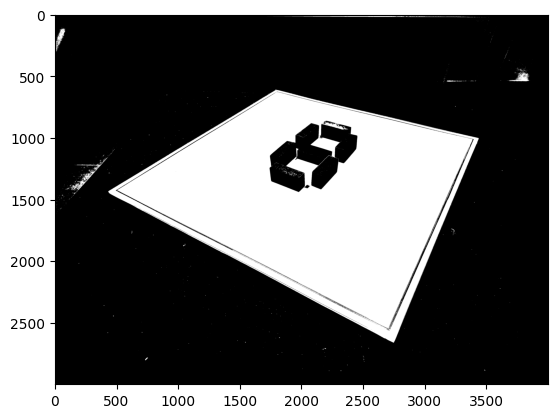

In [7]:
# find the board region
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

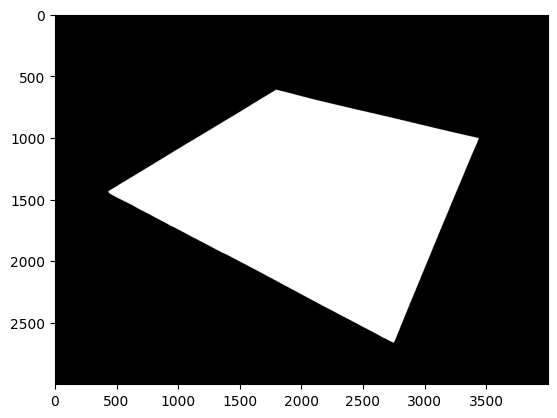

In [13]:
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
mask = np.zeros_like(gray)
cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)
plt.imshow(mask, cmap='gray')

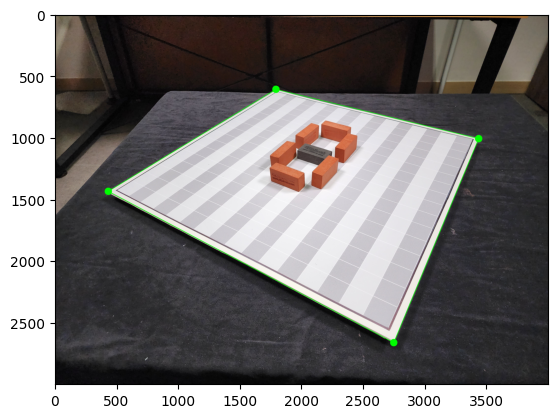

In [14]:
perimeter = cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, 0.05 * perimeter, True)

for point in approx:
    x, y = point[0]
    cv2.circle(image, (x, y), 30, (0, 255, 0), -1)

cv2.drawContours(image, [approx], -1, (0, 255, 0), 3)
plt.imshow(image)

In [15]:
approx[:, 0, :]

array([[ 432, 1437],
       [2748, 2664],
       [3437, 1010],
       [1792,  610]], dtype=int32)

In [16]:
def sort_vertices(vertices, h, w):
    image_corners = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]], dtype=np.float32)
    corner_candidates = []
    for i in range(4):
        corner_candidates.append(np.roll(vertices, i, axis=0))

    displacements = []
    for corners in corner_candidates:
        corners = np.array(corners, dtype=np.float32)
        displacement = 0
        for corner, image_corner in zip(corners, image_corners):
            displacement += np.linalg.norm(corner - image_corner)
        displacements.append(displacement)

    # Find the index of the minimum displacement
    min_displacement_index = np.argmin(displacements)

    # Select the corners with the minimum displacement
    best_corners = corner_candidates[min_displacement_index]

    return np.array(best_corners, dtype=np.float32)

적절한 경계 상자를 찾은 것 같습니다.
회전 시키도록 합니다.

[[1792.  610.]
 [ 432. 1437.]
 [2748. 2664.]
 [3437. 1010.]]


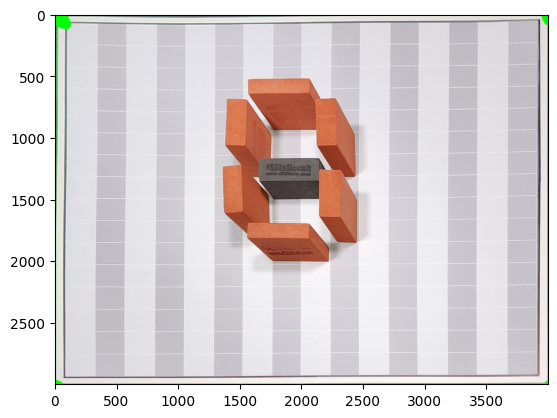

In [18]:
h, w, _ = image.shape

origin_points = sort_vertices(approx[:, 0, :], h, w)
print(origin_points)

# Define the destination points for perspective transformation
dest_points = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]])

# Calculate the perspective transformation matrix
perspective_matrix = cv2.getPerspectiveTransform(origin_points, dest_points)

# Apply the transformation to the image
transformed = cv2.warpPerspective(image, perspective_matrix, (w, h), flags=cv2.INTER_LINEAR)
plt.imshow(transformed)

일단은 보드 찾고 perspective transform하는 기능을 정리하겠습니다.

In [21]:
def get_board_contour(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    return largest_contour

def get_corners(contour):
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.05 * perimeter, True)
    return approx[:, 0, :]

def warp_image(img, origin_points, h, w):
    dest_points = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]])
    perspective_matrix = cv2.getPerspectiveTransform(origin_points, dest_points)
    transformed = cv2.warpPerspective(img, perspective_matrix, (w, h), flags=cv2.INTER_LINEAR)
    return transformed

def img_transform(img):
    contour = get_board_contour(img)
    corners = get_corners(contour)
    h, w, _ = img.shape
    origin_points = sort_vertices(corners, h, w)
    img = warp_image(img, origin_points, h, w)
    return img

사진을 무작위로 둘러보고 어떤 문제가 있는지 봅니다.

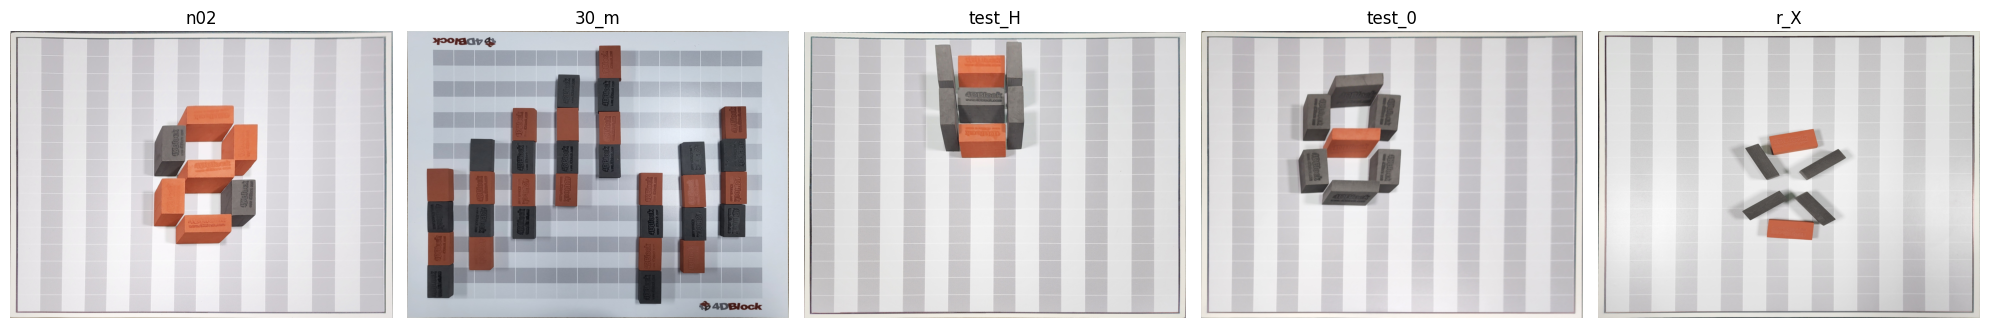

In [22]:
sampled_images = random.sample(image_files, 5)

# display images
fig, axs = plt.subplots(1, 5, figsize=(20, 20))
for i, image_file in enumerate(sampled_images):
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    image = img_transform(image)

    axs[i].set_title(image_file.split('/')[-2])
    axs[i].imshow(image)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

괜찮은 것 같습니다. 노이즈 조금 제거하도록 해보겠습니다.

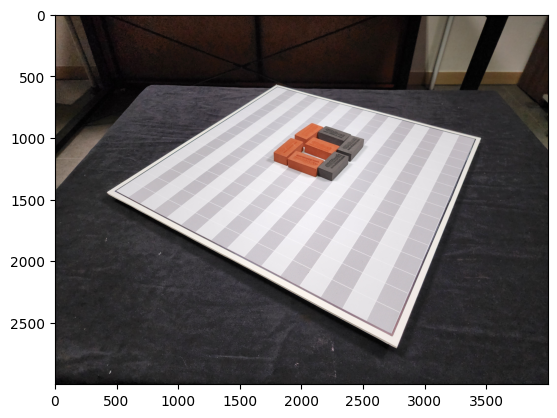

In [41]:
img = cv2.imread(image_files[782])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

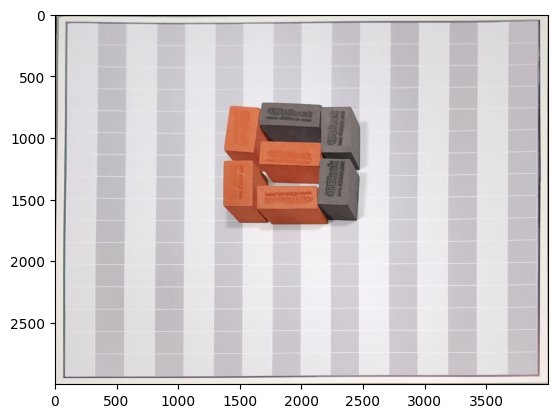

In [42]:
img = img_transform(img)
plt.imshow(img)

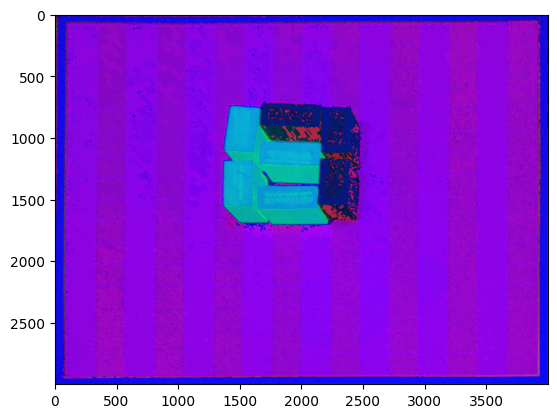

In [43]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

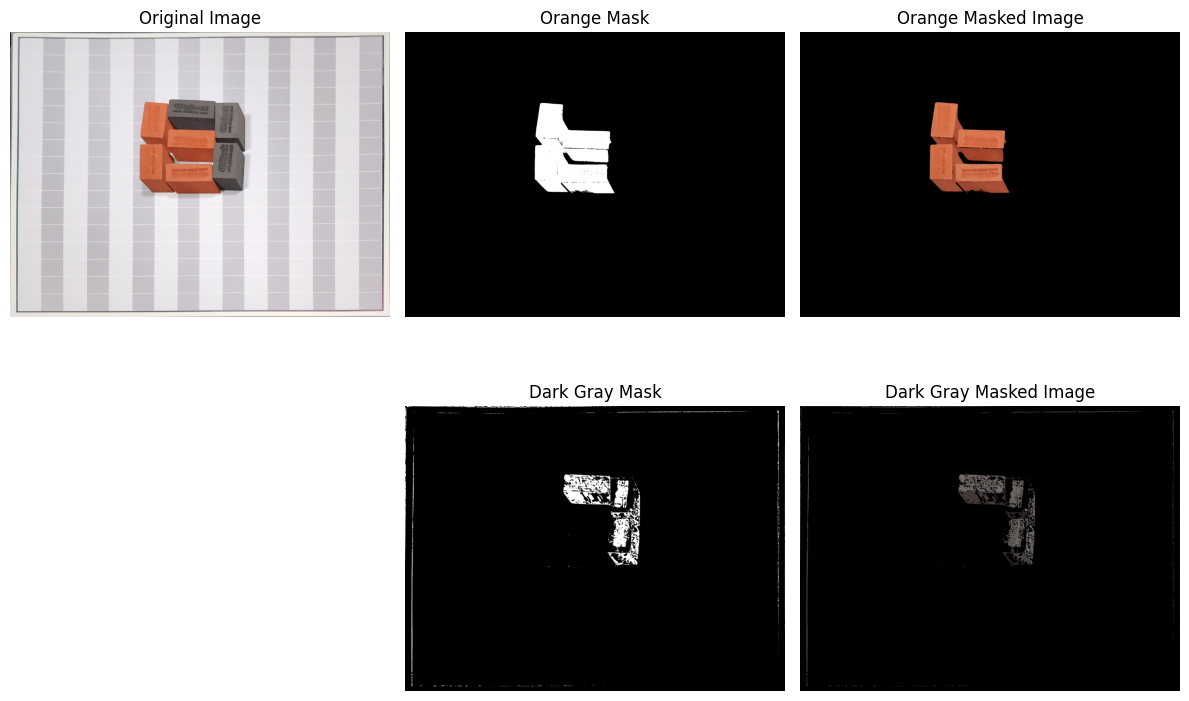

In [49]:
# Define the ranges for blue and dark gray in HSV
lower_orange = np.array([0, 100, 150])
upper_orange = np.array([50, 200, 255])

lower_dark_gray = np.array([0, 0, 0])
upper_dark_gray = np.array([120, 120, 120])

# Create masks for blue and dark gray colors in HSV
orange_mask = cv2.inRange(hsv_img, lower_orange, upper_orange)
dark_gray_mask = cv2.inRange(hsv_img, lower_dark_gray, upper_dark_gray)

# Apply masks to the original image
orange_masked_image = cv2.bitwise_and(img, img, mask=orange_mask)
dark_gray_masked_image = cv2.bitwise_and(img, img, mask=dark_gray_mask)

# Display the original image and the masked images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(orange_mask, cmap='gray')
plt.title("Orange Mask")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(orange_masked_image)
plt.title("Orange Masked Image")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(dark_gray_mask, cmap='gray')
plt.title("Dark Gray Mask")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(dark_gray_masked_image)
plt.title("Dark Gray Masked Image")
plt.axis('off')

plt.tight_layout()
plt.show()

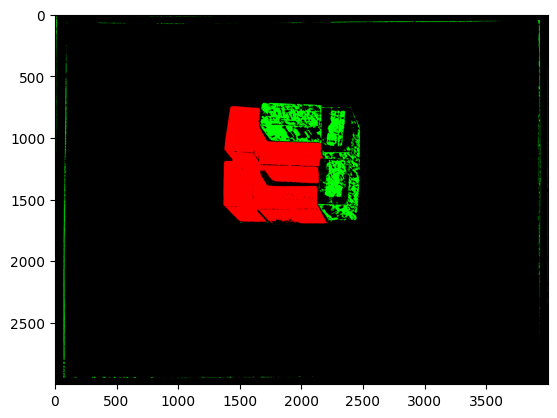

In [51]:
orange_contours, _ = cv2.findContours(orange_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
gray_contours, _ = cv2.findContours(dark_gray_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

res = np.zeros_like(img)

cv2.drawContours(res, orange_contours, -1, (255, 0, 0), cv2.FILLED)
cv2.drawContours(res, gray_contours, -1, (0, 255, 0), cv2.FILLED)

plt.imshow(res)

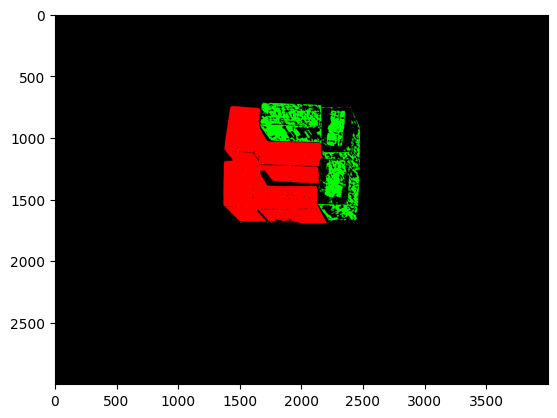

In [52]:
h, w, _ = img.shape

margin = int(0.1*min(h, w))
res[:margin, :] = 0
res[-margin:, :] = 0
res[:, :margin] = 0
res[:, -margin:] = 0

plt.imshow(res)

이것도 정리해봅시다.

In [53]:
def get_color_mask(img, color):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    lower = np.array(color[0])
    upper = np.array(color[1])

    mask = cv2.inRange(hsv_img, lower, upper)
    return mask

def trim_margin(img, margin):
    h, w, _ = img.shape

    margin = int(0.1*min(h, w))
    img[:margin, :] = 0
    img[-margin:, :] = 0
    img[:, :margin] = 0
    img[:, -margin:] = 0
    return img

def remove_background(img):
    orange = np.array([
        [0, 100, 150],
        [50, 200, 255]
    ])
    dark_gray = np.array([
        [0, 0, 0],
        [120, 120, 120]
    ])

    orange_mask = get_color_mask(img, orange)
    dark_gray_mask = get_color_mask(img, dark_gray)

    orange_contours, _ = cv2.findContours(orange_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    gray_contours, _ = cv2.findContours(dark_gray_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    res = np.zeros_like(img)

    cv2.drawContours(res, orange_contours, -1, (255, 0, 0), cv2.FILLED)
    cv2.drawContours(res, gray_contours, -1, (0, 255, 0), cv2.FILLED)

    res = trim_margin(res, 0.1)

    return res
    

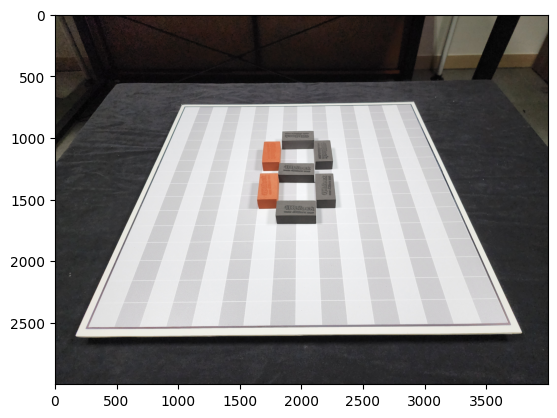

In [54]:
img = cv2.imread(image_files[351])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

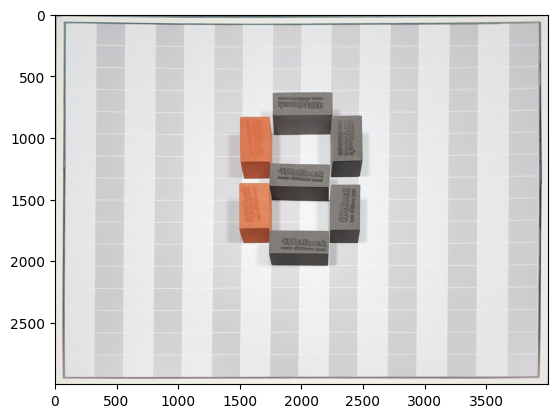

In [55]:
img = img_transform(img)
plt.imshow(img)

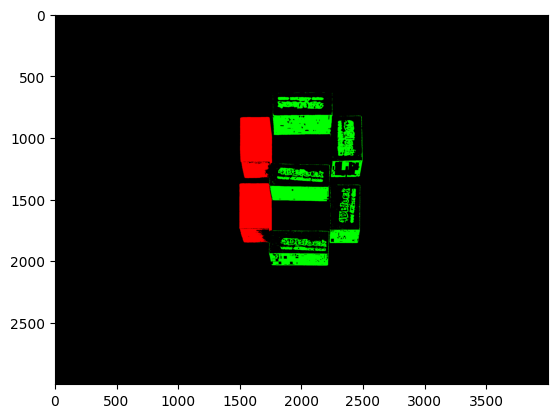

In [56]:
img = remove_background(img)
plt.imshow(img)

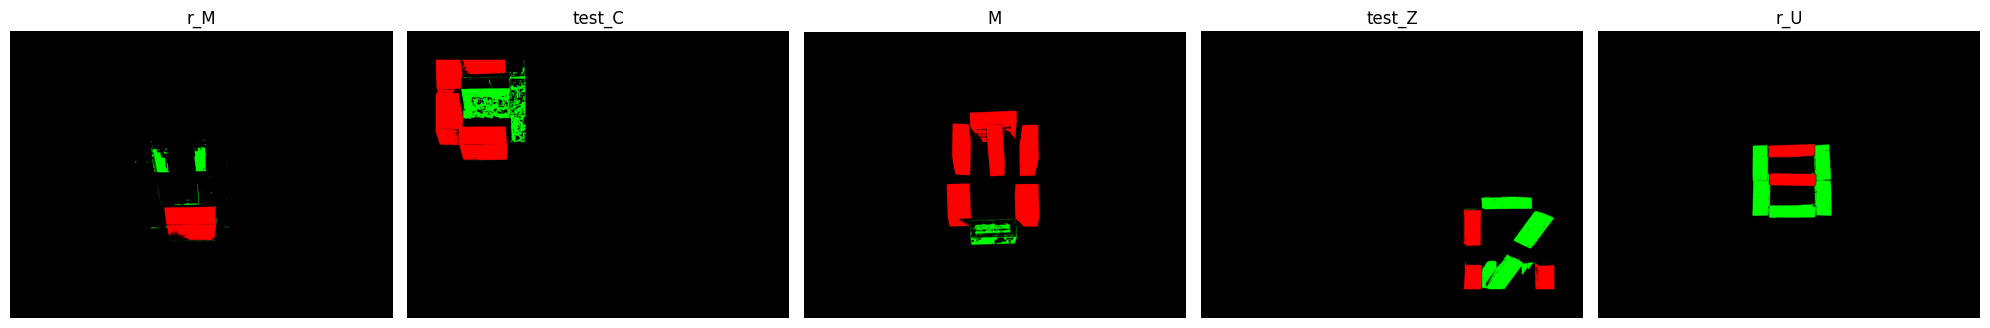

In [59]:
sampled_images = random.sample(image_files, 5)

# display images
fig, axs = plt.subplots(1, 5, figsize=(20, 20))
for i, image_file in enumerate(sampled_images):
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    image = img_transform(image)
    image = remove_background(image)
    
    axs[i].set_title(image_file.split('/')[-2])
    axs[i].imshow(image)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

이건 잘 모르겠네요. 아마 img_transform만 사용하는 것이 좋을 것 같습니다.

새로운 이미지 전처리 방법을 CNN에 사용해봅시다.

In [82]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = img_transform(image)
    image = remove_background(image)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0
    return image

In [71]:
images = X_train.apply(preprocess_image)
X_train_p = np.stack(images)
y_train_p = y_train.values

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/imgwarp.cpp:3528: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function 'getPerspectiveTransform'


In [73]:
problematic_indices = []

# Loop through each row in X_train and preprocess the images
for index, row in enumerate(X_train):
    try:
        preprocessed_image = preprocess_image(row)
    except Exception as e:
        print(f"Error processing image at index {index}: {e}")
        problematic_indices.append(index)

problematic_indices

Error processing image at index 4: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/imgwarp.cpp:3528: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function 'getPerspectiveTransform'

Error processing image at index 10: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/imgwarp.cpp:3528: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function 'getPerspectiveTransform'

Error processing image at index 51: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/imgwarp.cpp:3528: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function 'getPerspectiveTransform'

Error processing image at index 91: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/imgwarp.cpp:3528: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function 'getPerspectiveTransform'

Error processing image at index 96: OpenCV(4.8.0) /io/ope

KeyboardInterrupt: 

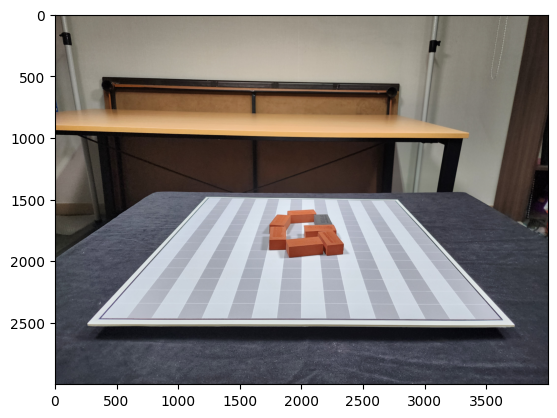

In [74]:
image_path = X_train.iloc[problematic_indices[0]]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [80]:
def img_transform(img):
    contour = get_board_contour(img)
    corners = get_corners(contour)
    if len(corners) != 4: return img
    h, w, _ = img.shape
    origin_points = sort_vertices(corners, h, w)
    img = warp_image(img, origin_points, h, w)
    return img

In [83]:
images = X_train.apply(preprocess_image)
X_train_p = np.stack(images)
y_train_p = y_train.values

KeyboardInterrupt: 

# 숫자 / 알파벳 모델

먼저 숫자 모델을 만들겠습니다. 알파벳 모델도 유사하겠죠.

In [84]:
data_path = "./data/숫자인식/"
!tree -d -L 1 $data_path

./data/숫자인식/
├── 숫자 추가
├── 00
├── 01
├── 02
├── 03
├── 04
├── 05
├── 06
├── 07
├── 08
└── 09

12 directories


In [87]:
classes = [str(i) for i in np.arange(10)]
classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [89]:
folder = {}
for class_name in classes:
    folder[class_name] = '0' + class_name
folder

{'0': '00',
 '1': '01',
 '2': '02',
 '3': '03',
 '4': '04',
 '5': '05',
 '6': '06',
 '7': '07',
 '8': '08',
 '9': '09'}

In [92]:
data = []

for class_name, folder_name in folder.items():
    folder_path = os.path.join(data_path, folder_name)
    image_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.jpg'):
                data.append({
                    'image_path': os.path.join(root, file),
                    'class': class_name
                })

df = pd.DataFrame(data)
df.head()

image_path class
0  ./data/숫자인식/00/n00/4d_n00_18.jpg     0
1  ./data/숫자인식/00/n00/4d_n00_01.jpg     0
2  ./data/숫자인식/00/n00/4d_n00_02.jpg     0
3  ./data/숫자인식/00/n00/4d_n00_03.jpg     0
4  ./data/숫자인식/00/n00/4d_n00_04.jpg     0

In [94]:
# one hot encode class
class_columns = classes
one_hot_encoded = pd.get_dummies(df['class'])
one_hot_encoded = one_hot_encoded[class_columns]

df = pd.concat([df, one_hot_encoded], axis=1)
df.drop(['class'], axis=1, inplace=True)
df.head()

image_path     0      1      2      3      4      5   
0  ./data/숫자인식/00/n00/4d_n00_18.jpg  True  False  False  False  False  False  \
1  ./data/숫자인식/00/n00/4d_n00_01.jpg  True  False  False  False  False  False   
2  ./data/숫자인식/00/n00/4d_n00_02.jpg  True  False  False  False  False  False   
3  ./data/숫자인식/00/n00/4d_n00_03.jpg  True  False  False  False  False  False   
4  ./data/숫자인식/00/n00/4d_n00_04.jpg  True  False  False  False  False  False   

       6      7      8      9  
0  False  False  False  False  
1  False  False  False  False  
2  False  False  False  False  
3  False  False  False  False  
4  False  False  False  False

In [95]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = img_transform(image)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0
    return image

In [97]:
df['image'] = df['image_path'].apply(preprocess_image)
df.head()

image_path     0      1      2      3      4      5   
0  ./data/숫자인식/00/n00/4d_n00_18.jpg  True  False  False  False  False  False  \
1  ./data/숫자인식/00/n00/4d_n00_01.jpg  True  False  False  False  False  False   
2  ./data/숫자인식/00/n00/4d_n00_02.jpg  True  False  False  False  False  False   
3  ./data/숫자인식/00/n00/4d_n00_03.jpg  True  False  False  False  False  False   
4  ./data/숫자인식/00/n00/4d_n00_04.jpg  True  False  False  False  False  False   

       6      7      8      9   
0  False  False  False  False  \
1  False  False  False  False   
2  False  False  False  False   
3  False  False  False  False   
4  False  False  False  False   

                                               image  
0  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
1  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
2  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
3  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
4  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...

In [99]:
X = np.stack(df['image'])
y = df[class_columns].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((950, 224, 224, 3), (50, 224, 224, 3), (950, 10), (50, 10))

In [101]:

base_model = tf.keras.models.load_model('preprocessed_img_cnn.h5')
base_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

아까 잘된 모델 다시 사용하기

In [106]:
model = tf.keras.Model(inputs=base_model.input, outputs=base_model.layers[-2].output)
new_out = Dense(10, activation='softmax')(model.output)
model = tf.keras.Model(inputs=model.input, outputs=new_out)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer  [(None, 224, 224, 3)]     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                           

In [107]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
27/27 [==============================] - 26s 935ms/step - loss: 2.3131 - accuracy: 0.2152 - val_loss: 1.8465 - val_accuracy: 0.5158
Epoch 2/10
27/27 [==============================] - 25s 942ms/step - loss: 1.2396 - accuracy: 0.6117 - val_loss: 0.3855 - val_accuracy: 0.9263
Epoch 3/10
27/27 [==============================] - 24s 895ms/step - loss: 0.3845 - accuracy: 0.8877 - val_loss: 0.1516 - val_accuracy: 0.9474
Epoch 4/10
27/27 [==============================] - 24s 885ms/step - loss: 0.2037 - accuracy: 0.9404 - val_loss: 0.1453 - val_accuracy: 0.9474
Epoch 5/10
27/27 [==============================] - 24s 878ms/step - loss: 0.1204 - accuracy: 0.9696 - val_loss: 0.0407 - val_accuracy: 0.9789
Epoch 6/10
27/27 [==============================] - 24s 883ms/step - loss: 0.1076 - accuracy: 0.9696 - val_loss: 0.0500 - val_accuracy: 0.9789
Epoch 7/10
27/27 [==============================] - 24s 880ms/step - loss: 0.0675 - accuracy: 0.9766 - val_loss: 0.0384 - val_accuracy: 0.9895

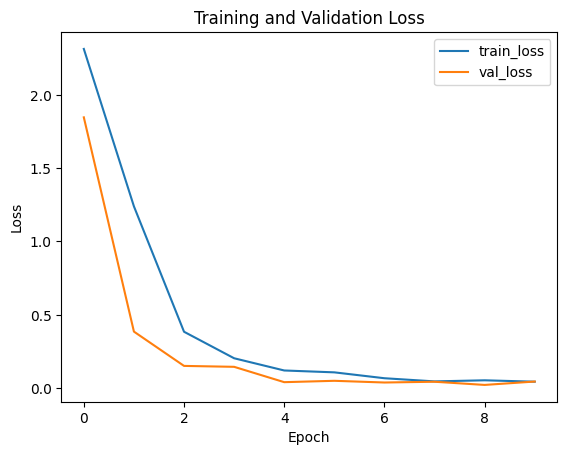

In [108]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

거의 완벽합니다.
그 이상 기대하기가 어렵겠네요. 그냥 사용합니다.

In [110]:
model.save('preprocessed_img_cnn_numbers.keras')

문제 없는지 확인하도록 몇개 예측해봅시다.

1/1 [==============================] - 0s 46ms/step
[1 7 4 9 9]


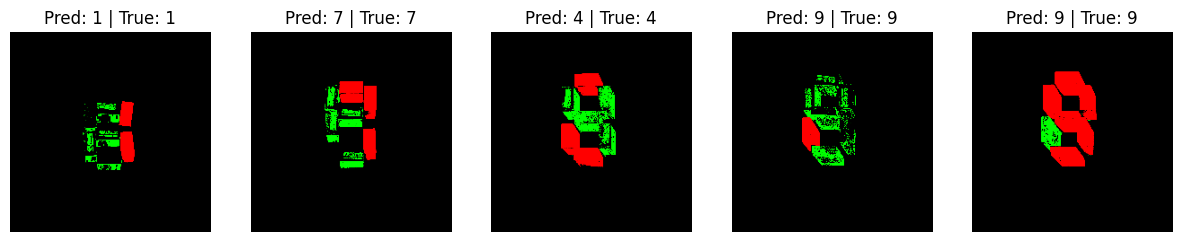

In [131]:
# get 5 random images
sample_indices = random.sample(range(len(X_train)), 5)
preds = model.predict(X_train[sample_indices])
class_preds = np.argmax(preds, axis=1)

# display images and labels
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, idx in enumerate(sample_indices):
    image = X_train[idx]
    label_row = y_train[idx]
    class_pred = class_preds[i]
    class_name = classes[np.argmax(label_row)]

    axes[i].imshow(image)
    axes[i].set_title("Pred: {} | True: {}".format(class_pred, class_name))
    axes[i].axis('off')

## 알파벳

In [132]:
data_path = "./data/알파벳인식/"
!tree -d -L 1 $data_path

./data/알파벳인식/
├── 알파벳 추가
├── A
├── B
├── C
├── D
├── E
├── F
├── G
├── H
├── I
├── J
├── K
├── L
├── M
├── N
├── O
├── P
├── Q
├── R
├── S
├── T
├── U
├── V
├── W
├── X
├── Y
└── Z

28 directories


In [133]:
# classes from A to Z
classes = [chr(i) for i in np.arange(65, 91)]
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [134]:
data = []

for class_name in classes:
    folder_path = os.path.join(data_path, class_name)
    image_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.jpg'):
                data.append({
                    'image_path': os.path.join(root, file),
                    'class': class_name
                })

df = pd.DataFrame(data)
df.head()

image_path class
0  ./data/알파벳인식/A/A/4d_al_a_18.jpg     A
1  ./data/알파벳인식/A/A/4d_al_a_01.jpg     A
2  ./data/알파벳인식/A/A/4d_al_a_02.jpg     A
3  ./data/알파벳인식/A/A/4d_al_a_03.jpg     A
4  ./data/알파벳인식/A/A/4d_al_a_04.jpg     A

In [135]:
# one hot encode class
class_columns = classes
one_hot_encoded = pd.get_dummies(df['class'])
one_hot_encoded = one_hot_encoded[class_columns]

df = pd.concat([df, one_hot_encoded], axis=1)
df.drop(['class'], axis=1, inplace=True)
df.head()

image_path     A      B      C      D      E      F   
0  ./data/알파벳인식/A/A/4d_al_a_18.jpg  True  False  False  False  False  False  \
1  ./data/알파벳인식/A/A/4d_al_a_01.jpg  True  False  False  False  False  False   
2  ./data/알파벳인식/A/A/4d_al_a_02.jpg  True  False  False  False  False  False   
3  ./data/알파벳인식/A/A/4d_al_a_03.jpg  True  False  False  False  False  False   
4  ./data/알파벳인식/A/A/4d_al_a_04.jpg  True  False  False  False  False  False   

       G      H      I  ...      Q      R      S      T      U      V      W   
0  False  False  False  ...  False  False  False  False  False  False  False  \
1  False  False  False  ...  False  False  False  False  False  False  False   
2  False  False  False  ...  False  False  False  False  False  False  False   
3  False  False  False  ...  False  False  False  False  False  False  False   
4  False  False  False  ...  False  False  False  False  False  False  False   

       X      Y      Z  
0  False  False  False  
1  False  False  False  
2  False  False  False  
3  False  False  False  
4  False  False  False  

[5 rows x 27 columns]

In [136]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = img_transform(image)
    image = remove_background(image)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0
    return image

In [137]:
df['image'] = df['image_path'].apply(preprocess_image)
df.head()

image_path     A      B      C      D      E      F   
0  ./data/알파벳인식/A/A/4d_al_a_18.jpg  True  False  False  False  False  False  \
1  ./data/알파벳인식/A/A/4d_al_a_01.jpg  True  False  False  False  False  False   
2  ./data/알파벳인식/A/A/4d_al_a_02.jpg  True  False  False  False  False  False   
3  ./data/알파벳인식/A/A/4d_al_a_03.jpg  True  False  False  False  False  False   
4  ./data/알파벳인식/A/A/4d_al_a_04.jpg  True  False  False  False  False  False   

       G      H      I  ...      R      S      T      U      V      W      X   
0  False  False  False  ...  False  False  False  False  False  False  False  \
1  False  False  False  ...  False  False  False  False  False  False  False   
2  False  False  False  ...  False  False  False  False  False  False  False   
3  False  False  False  ...  False  False  False  False  False  False  False   
4  False  False  False  ...  False  False  False  False  False  False  False   

       Y      Z                                              image  
0  False  False  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
1  False  False  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
2  False  False  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
3  False  False  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
4  False  False  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  

[5 rows x 28 columns]

In [138]:
X = np.stack(df['image'])
y = df[class_columns].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2489, 224, 224, 3), (131, 224, 224, 3), (2489, 26), (131, 26))

In [139]:
model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
new_out = Dense(26, activation='softmax')(model.output)
model = tf.keras.Model(inputs=model.input, outputs=new_out)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer  [(None, 224, 224, 3)]     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                           

In [140]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
70/70 [==============================] - 63s 884ms/step - loss: 3.7868 - accuracy: 0.0567 - val_loss: 3.1437 - val_accuracy: 0.0924
Epoch 2/10
70/70 [==============================] - 62s 879ms/step - loss: 2.9962 - accuracy: 0.0973 - val_loss: 2.6999 - val_accuracy: 0.2209
Epoch 3/10
70/70 [==============================] - 61s 870ms/step - loss: 2.2962 - accuracy: 0.3045 - val_loss: 1.6215 - val_accuracy: 0.5141
Epoch 4/10
70/70 [==============================] - 60s 852ms/step - loss: 1.3550 - accuracy: 0.5857 - val_loss: 0.8245 - val_accuracy: 0.7470
Epoch 5/10
70/70 [==============================] - 61s 869ms/step - loss: 0.7803 - accuracy: 0.7384 - val_loss: 0.5185 - val_accuracy: 0.8434
Epoch 6/10
70/70 [==============================] - 63s 896ms/step - loss: 0.5209 - accuracy: 0.8366 - val_loss: 0.3851 - val_accuracy: 0.8755
Epoch 7/10
70/70 [==============================] - 58s 832ms/step - loss: 0.4014 - accuracy: 0.8679 - val_loss: 0.3508 - val_accuracy: 0.9036

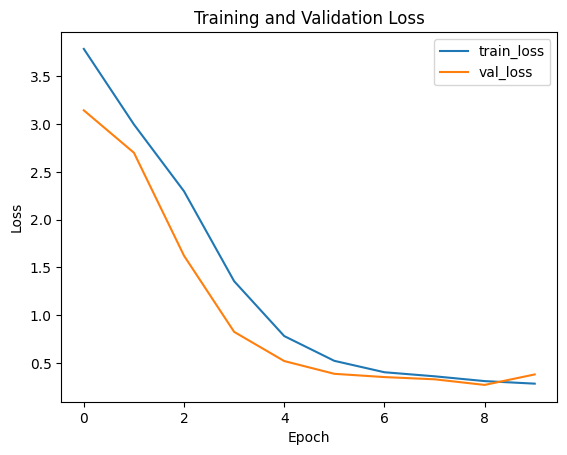

In [141]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [142]:
model.save("preprocessed_img_cnn_alphabet.keras")

1/1 [==============================] - 0s 50ms/step


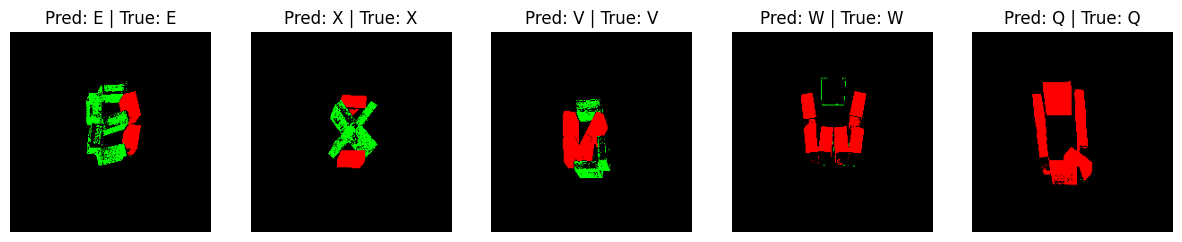

In [144]:
# get 5 random images
sample_indices = random.sample(range(len(X_train)), 5)
preds = model.predict(X_train[sample_indices])
class_preds = np.argmax(preds, axis=1)

# display images and labels
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, idx in enumerate(sample_indices):
    image = X_train[idx]
    label_row = y_train[idx]
    class_pred = class_preds[i]
    class_pred = chr(ord('A') + class_pred)

    class_name = classes[np.argmax(label_row)]

    axes[i].imshow(image)
    axes[i].set_title("Pred: {} | True: {}".format(class_pred, class_name))
    axes[i].axis('off')